___
# Ciência dos Dados - PROJETO 1

## Rafael Alves de Mello Almada
___

## Machismo e tecnologia

___
## O machismo presente nas diversas regiões do Brasil atrasam o desenvolvimento tecnológico do país?

Com esta pesquisa, pretendo analisar o machismo presente nas diversas regiões do Brasil e ver se ele é um impacto ao desenvolvimento tecnológico do país e ao acesso à tecnologia do brasileiro. 

___
## Filtros da base de dados

In [44]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [45]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\rafaa\Documents\GitHub\Dados_DP_2018


In [46]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
df=pd.read_csv('PES2015csv (2).zip', compression='zip', header=0, sep=',', quotechar='"')
#df2011=pd.read_excel('PES2011csv.zip', compression='zip',header=0,sep=',',quotechar='"')

In [47]:
df.loc[(df.UF>10)&(df.UF<19),'Região']='Norte'
df.loc[(df.UF>20)&(df.UF<29),'Região']='Nordeste'
df.loc[(df.UF>30)&(df.UF<39),'Região']='Sudeste'
df.loc[(df.UF>40)&(df.UF<49),'Região']='Sul'
df.loc[(df.UF>50)&(df.UF<59),'Região']='Centro-Oeste'

In [48]:
df.V0302=df.V0302.astype('category') #sexo
df.V8005=df.V8005.astype('float') #Idade do morador no ano de referência
df.V0601=df.V0601.astype('category') #sabe ler e escrever
df.V0602=df.V0602.astype('category') #frequenta escola
df.V6003=df.V6003.astype('category') #Curso que frequenta
df.V0606=df.V0606.astype('category') #frequentou antes escola
df['Região']=df['Região'].astype('category') #Unidade da Federação
df.V4011=df.V4011.astype('category') #Estado Civil
df.V9029=df.V9029.astype('category') #Posição na ocupação no trabalho principal
df.V9532=df.V9532.astype('float') #rendimento mensal (salario)

In [49]:
df.V0302.cat.categories=(['Masculino','Feminino'])
df.V0601.cat.categories=(['Sim','Não'])
df.V0602.cat.categories=(['Sim','Não'])
df.V6003.cat.categories=(['Regular do ensino fundamental','Regular do ensino médio','Educação de jovens e adultos ou supletivo do ensino fundamental','Educação de jovens e adultos ou supletivo do ensino médio','Superior de graduação','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA','Maternal, jardim de infância etc.','Pré-vestibular','Mestrado ou doutorado'])
df.V0606.cat.categories=['Sim','Não']
df['Região'].cat.categories=(['Norte','Nordeste','Sudeste','Sul','Centro-Oeste'])
df.V9029.cat.categories=(['Empregado','Trabalhador doméstico','Conta própria','Empregador','Trabalhador não remunerado membro da unidade domiciliar','Outro trabalhador não remunerado','Trabalhador na construção para o próprio uso'])

In [50]:
df.loc[(df.V0602=='Sim'),'Já estudou/estuda']='Sim'
df.loc[(df.V0602=='Não')&(df.V0606=='Sim'),'Já estudou/estuda']='Sim'
df.loc[(df.V0602=='Não')&(df.V0606=='Não'),'Já estudou/estuda']='Não'

In [51]:
print('Porcentagem da população feminina em relação ao total: {0}%'.format(100*df.V0302.value_counts()[1]/df.V0302.count()))

Porcentagem da população feminina em relação ao total: 51.46509985878556%


In [52]:
df2015=pd.DataFrame()
df2015['Região']=df['Região']
df2015['Sexo']=df.V0302
df2015['Idade do morador na data de referência']=df.V8005
df2015['Sabe ler e escrever']=df.V0601
df2015['Já estudou ou estuda']=df['Já estudou/estuda']
df2015['Curso que frequenta']=df.V6003
df2015['Posição na ocupação no trabalho principal']=df.V9029
df2015['Salário']=df.V9532
df2015.dropna(how="any")

df2015.head()

,Região,Sexo,Idade do morador na data de referência,Sabe ler e escrever,Já estudou ou estuda,Curso que frequenta,Posição na ocupação no trabalho principal,Salário
0,Sudeste,Masculino,23.0,Sim,Sim,NaN,Empregado,800.0
1,Sudeste,Feminino,23.0,Sim,Sim,NaN,Empregado,1150.0
2,Sudeste,Feminino,35.0,Sim,Sim,Superior de graduação,Empregado,880.0
3,Sudeste,Masculino,34.0,Sim,Sim,NaN,Empregador,3000.0
4,Sudeste,Feminino,11.0,Sim,Sim,Regular do ensino fundamental,NaN,NaN


In [53]:
ct1=pd.crosstab(df2015.Sexo,df2015['Posição na ocupação no trabalho principal'])
ct1

Posição na ocupação no trabalho principal,Empregado,Trabalhador doméstico,Conta própria,Empregador,Trabalhador não remunerado membro da unidade domiciliar,Outro trabalhador não remunerado,Trabalhador na construção para o próprio uso
Sexo,,,,,,,
Masculino,53553,928,19874,3832,456,142,162
Feminino,39605,10137,11383,1630,921,249,29


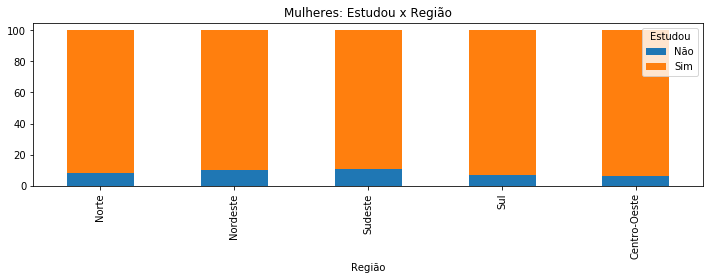

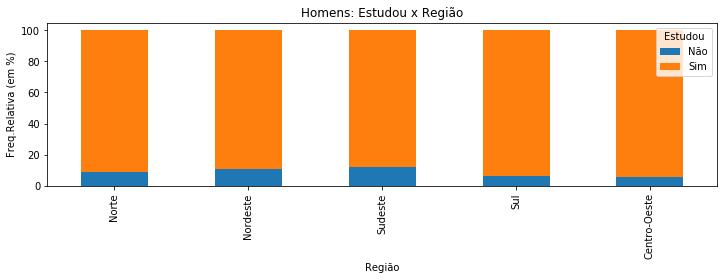

In [54]:
sem_homi = df2015[df2015.Sexo=='Feminino']
so_homi=df2015[df2015.Sexo=='Masculino']

ct1= (pd.crosstab(sem_homi['Região'], sem_homi['Já estudou ou estuda'], margins=True, rownames=['Região'], colnames=['Estudou'], normalize="index")*100).round(decimals=1)
ct2=(pd.crosstab(so_homi['Região'], so_homi['Já estudou ou estuda'], margins=True, rownames=['Região'], colnames=['Estudou'], normalize='index')*100).round(decimals=1)
ct5 = ct1.iloc[0:5,0:2]
ct6=ct2.iloc[0:5,0:2]
plot = ct5.plot(kind='bar', stacked=True, figsize=(12,3), title='Mulheres: Estudou x Região')
plot = ct6.plot(kind='bar', stacked=True, figsize=(12,3), title='Homens: Estudou x Região')
plt.ylabel('Freq.Relativa (em %)')

plt.show()


In [55]:
out=sem_homi[abs(sem_homi['Salário']-sem_homi['Salário'].mean())<=(3*sem_homi['Salário'].std())]
bra = out['Salário']

putz=df2015[abs(df2015['Salário']-df2015['Salário'].mean())<=(3*df2015['Salário'].std())]
iago=putz['Salário']

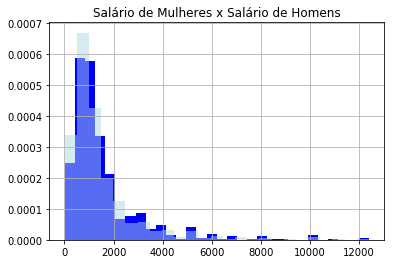

In [56]:
bra=bra[bra<12500]
iago=iago[iago<12500]
plt.title('Salário de Mulheres x Salário de Homens')
iago.hist(bins=30,normed=True,color='blue',label='Homens')
plt.hist(bra, bins=25,normed='index',color='lightblue',alpha=0.5, label='Mulheres')
#plt.legend('Homens','Mulheres')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

___
## Análise e Resultados

A análise do gráfico de mulheres que estudaram por

## Conclusão 

Descreva aqui suas conclusões!